In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
df=pd.read_csv('spam.csv', encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [3]:
# Checking the significance of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We can clearly see that the last three columns has very less values present so removing those columns

In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
# The column names are not making any sense
df.rename(columns={'v1':'Target', 'v2':'Msg'}, inplace=True)
df.head()

,Target,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# We need the ouput in numeric form so replacing ham as 0 & spam as 1
df['Target']=df['Target'].map({'ham':0, 'spam':1})
df.head()

# Though we can also use a label encoder

,Target,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

Target    0
Msg       0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

## EDA

In [12]:
df.head()

,Target,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Data Distribution
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

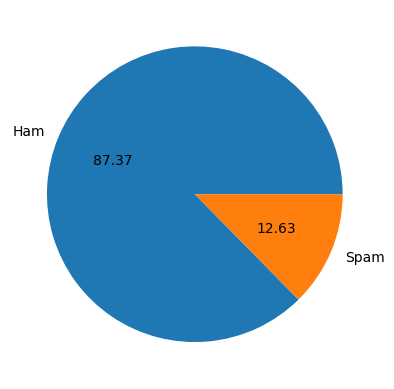

In [14]:
# Visualizing data distribution
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()

So we can see that the data is imbalanced

### Text Analysis

- We perform text analysis with the help of NLTK library.
- NLTK is a comprehensive library that provides tools and resources for tasks such as tokenization, stemming, lemmatization, parsing, semantic reasoning, and more, making it a versatile toolkit for working with human language data.

- We are going to create three columns:
    1. Number of Characters present in each row in Message column.
    2. Number of Words present in each row in Message column.
    3. Number of Sentences present in each row in Message column.

In [15]:
# !pip install nltk
import nltk
nltk.download('punkt') # Dependencies of nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# Number of characters for each Msg
df['Total_characters'] = df['Msg'].apply(len)

# Number of words for each Msg
df['Total_words'] = df['Msg'].apply(lambda x:len(nltk.word_tokenize(x)))

# Number of sentences for each Msg
df['Total_sentences'] = df['Msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,Target,Msg,Total_characters,Total_words,Total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
df.describe()

,Target,Total_characters,Total_words,Total_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [18]:
# Numerical Analysis for Ham messages
df[df['Target'] == 0].describe()

,Target,Total_characters,Total_words,Total_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [19]:
# Numerical Analysis for Spam messages
df[df['Target'] == 1].describe()

,Target,Total_characters,Total_words,Total_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


- From the numerical analysis of Ham & spam messages we can observe that:
  - For Ham Messages:
    1. There are averagely 70 characters per maessage for ham messages.
    2. There are averagely 17 words  per message for ham messages.
    3. There are atleast 1 sentence present in ham messages.
    4. There are maximum 910 characters, 220 words & 38 sentences are present in ham messages.
    
  - For Spam Messages:
    1. There are averagely 137 characters per meassage for Spam messages.
    2. There are averagely 27 words  per message for spam messages.
    3. There are atleast 2 sentence present in ham messages.
    4. There are maximum 224 characters, 46 words & 9 sentences are present in ham messages.

- From the numerical analysis we can conclude that:
    1. Spam messages are not generally too short & not too long as well.
    2. Ham messages are generally smaller than spam but in some cases are longer than spam also.

### Visualizing the above observations

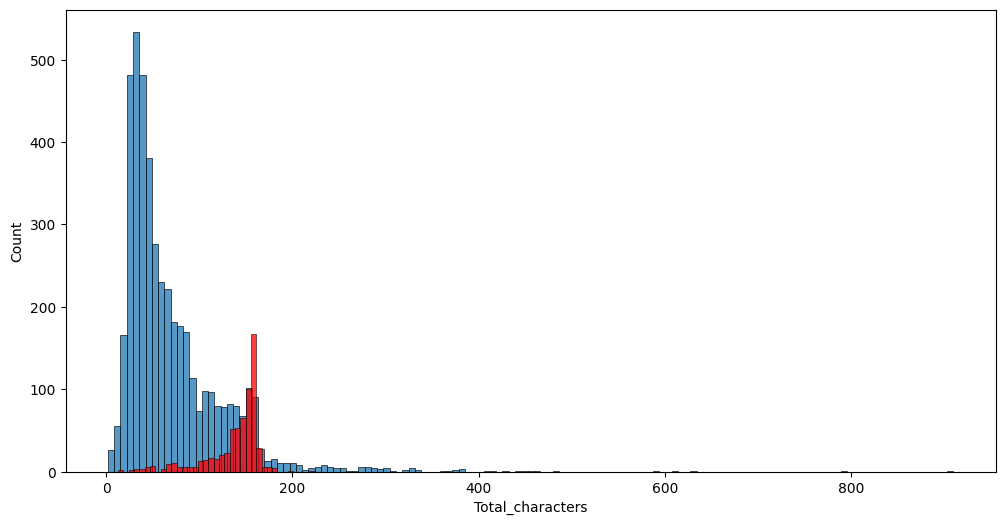

In [20]:
# For Characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['Total_characters'])
sns.histplot(df[df['Target'] == 1]['Total_characters'],color='red')
plt.show()

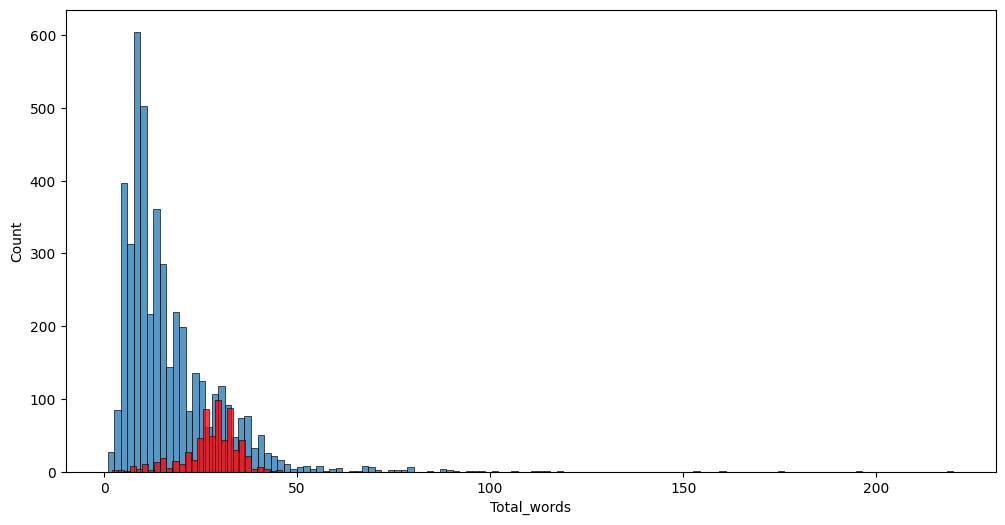

In [21]:
# For Words
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['Total_words'])
sns.histplot(df[df['Target'] == 1]['Total_words'],color='red')
plt.show()

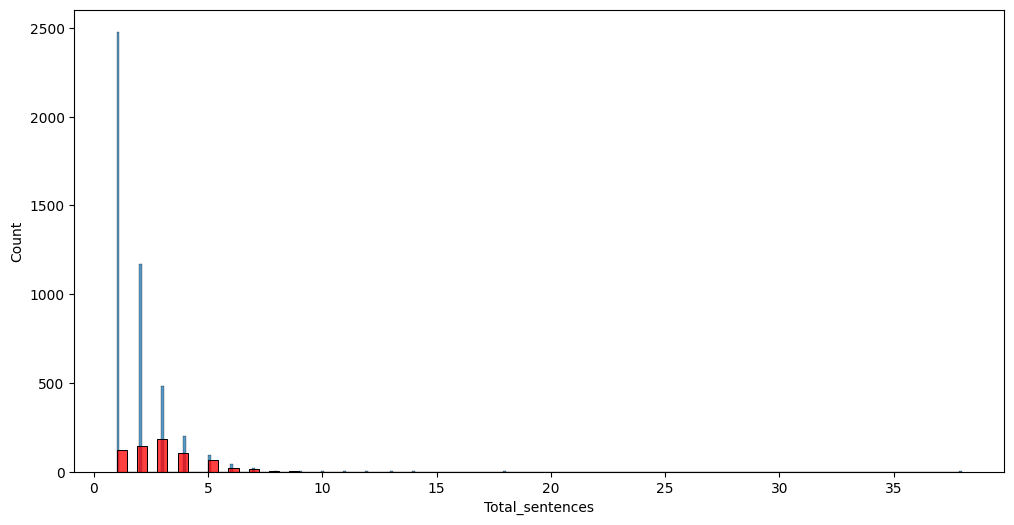

In [22]:
# For Words
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['Total_sentences'])
sns.histplot(df[df['Target'] == 1]['Total_sentences'],color='red')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

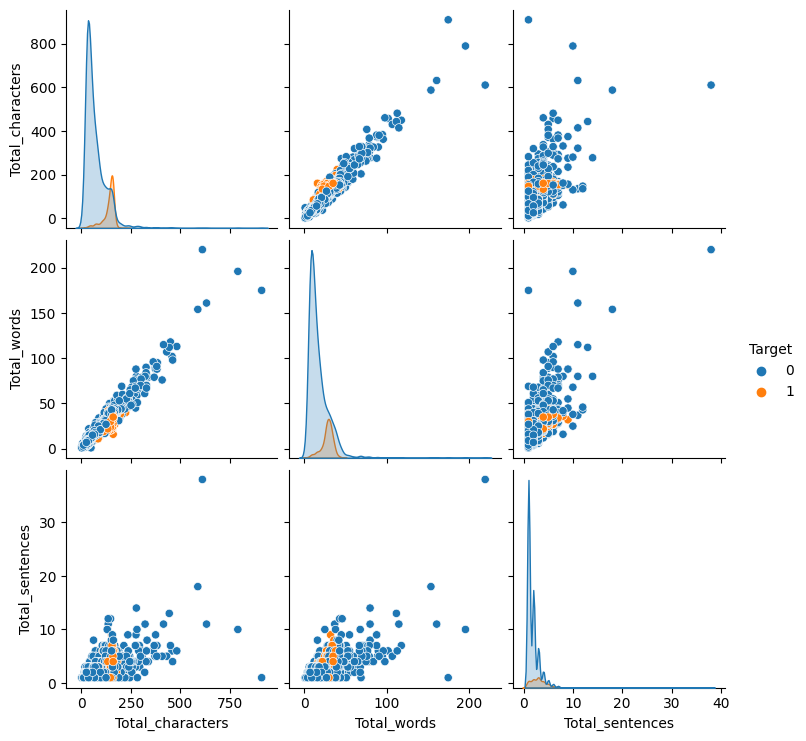

In [23]:
# Relation b/w columns with respect to Target column
sns.pairplot(df,hue='Target')
plt.plot

<AxesSubplot: >

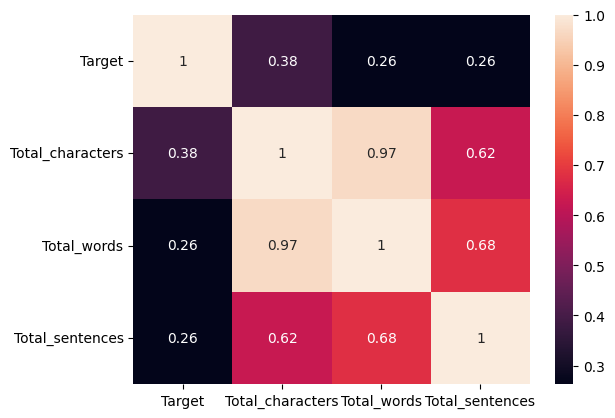

In [24]:
# Correlation
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
numeric_df = df.drop(columns=non_numeric_columns)
sns.heatmap(numeric_df.corr(), annot=True)

## Data Pre-processing

- Convert msg into lower case
- Perform Tokenization
- Removing special characters like @
- Removing stop words and punctuation
- Perform Stemming via PorterStemmer from nltk

In [25]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [26]:
def transform_msg(Msg):
    Msg=Msg.lower() # Lower Case
    Msg=nltk.word_tokenize(Msg) # Tokenization
    
    # Appending all the words except special characters.
    y=[]
    for i in Msg:
        if i.isalnum():
            y.append(i)

    Msg=y[:]
    y.clear()
    
    # Appending all the words except stopwords & punctuations.
    for i in Msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Msg=y[:]
    y.clear()
    
    # Stemming
    for i in Msg:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [27]:
df['Processed_Msg'] = df['Msg'].apply(transform_msg)
df.head()

,Target,Msg,Total_characters,Total_words,Total_sentences,Processed_Msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


- Implementing wordcloud individually on ham & spam messages to see the significance of the words
- A word cloud is a data visualization technique used to represent text data, typically showing the most frequent words in a corpus. In a word cloud, words are arranged in varying sizes, where the size of each word represents its frequency or importance within the given text.

In [28]:
# !pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

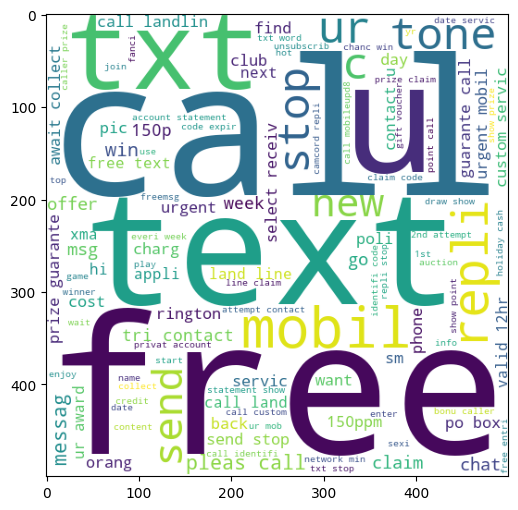

In [29]:
# Wordcloud for spam messages
spam_wc=wc.generate(df[df['Target']==1]['Processed_Msg'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

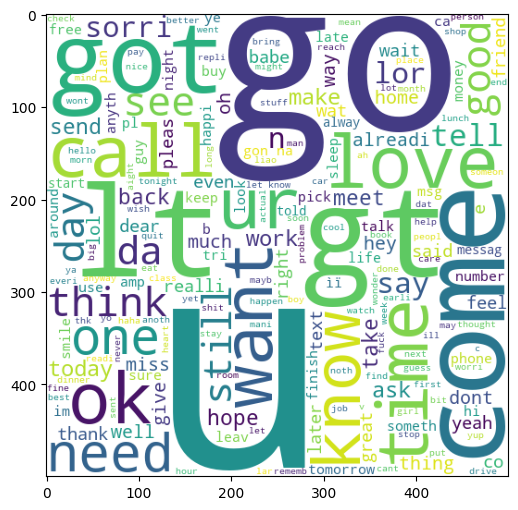

In [30]:
# Wordcloud for Ham messages
ham_wc = wc.generate(df[df['Target'] == 0]['Processed_Msg'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [31]:
# Top words used in spam sms
spam_corpus = []
for msg in df[df['Target']==1]['Processed_Msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9939

 Now we'll import a library known as counter which creates a dictionary of the respective wordcloud's words with their frequency. With the help of this we can select the most common words

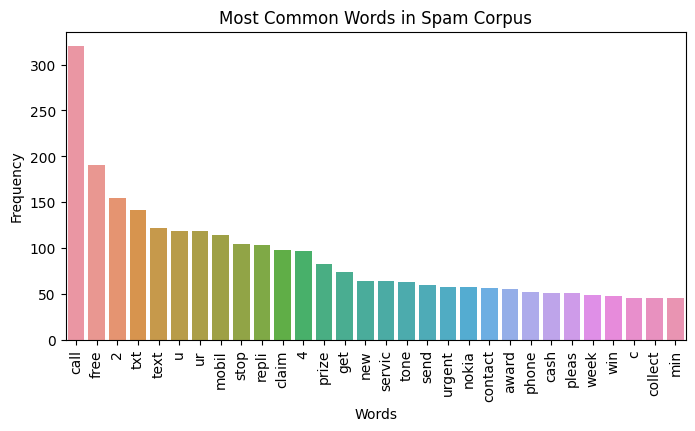

In [32]:
from collections import Counter

spam_counter = Counter(spam_corpus)
common_words = dict(spam_counter.most_common(30))
df_common_words = pd.DataFrame(list(common_words.items()), columns=['Word', 'Frequency'])

# Creating the bar plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Word', y='Frequency', data=df_common_words)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Spam Corpus')
plt.show()

In [33]:
# Top words used in ham sms
ham_corpus=[]
for msg in df[df['Target']==0]['Processed_Msg'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

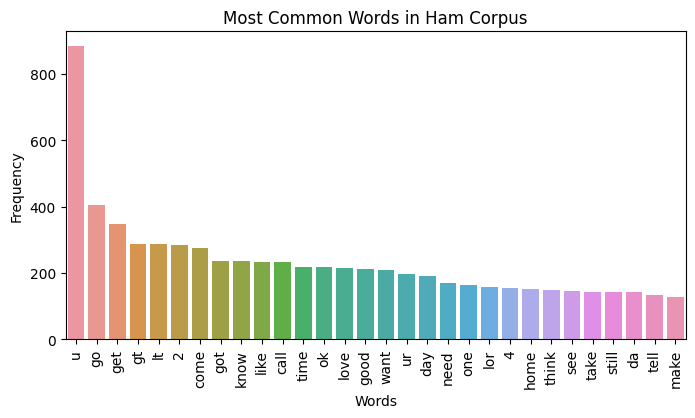

In [34]:
ham_counter = Counter(ham_corpus)
common_words = dict(ham_counter.most_common(30))
df_common_words = pd.DataFrame(list(common_words.items()), columns=['Word', 'Frequency'])

# Creating the bar plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Word', y='Frequency', data=df_common_words)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Ham Corpus')
plt.show()


## Model Building
- As we know that Naive bayes is the best algorithm to train text data so first we try to train our model with Naive bayes.
- We need the Input & Output feature in numerical form, but the input is categorical form.
- So we've to vectorize the input feature ie. convert them into vectors. This process s known as vectorization.

In [35]:
# Vectorization through tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

### Preparing data for training & testing

In [36]:
x=tfidf.fit_transform(df['Processed_Msg']).toarray()
x.shape

(5169, 3000)

In [37]:
y=df['Target'].values
y.shape

(5169,)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=42, test_size=0.2)

In [39]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [40]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [41]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [42]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


- From the above two models we can observe that Multinomial Naive Bayes Model is performing well & there is 99% precision as well.
- Let's use some more algorithms than Naive Bayes & compare with MNB.
- The algorithms we use for comparision are: 
    1. Naive Bayes --> Multinomial Naive Bayes
    2. Logistic Regression
    3. SVM
    4. Decision Tree
    5. KNN Classifier
    6. Random Forest Classifier
    7. AdaBoost Classifier
    8. Bagging Classifier
    9. ExtraTrees Classifier
    10. Gradient Boosting Classifier
    11. XG Boost Classifier

In [43]:
# Importing all the above mentioned algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [44]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [45]:
clfs={
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [46]:
# Function to to train the data one by one by various algorithm & return accuracy & precision.
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [47]:
accuracy_scores=[]
precision_scores=[]

for name, clf in clfs.items():
    current_accuracy, current_precision=train_classifier(clf, x_train, y_train, x_test, y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8275862068965517
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934
For  RF
Accuracy -  0.971953578336557
Precision -  0.9754098360655737
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8840579710144928
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9841269841269841
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.96875
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9375


In [48]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,RF,0.971954,0.975410
9,GBDT,0.946809,0.968750
0,SVC,0.976789,0.954887
10,xgb,0.968085,0.937500
7,BgC,0.962282,0.884058
4,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


In [49]:
performance_df1=pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.971954
4,GBDT,Accuracy,0.946809
5,SVC,Accuracy,0.976789
6,xgb,Accuracy,0.968085
7,BgC,Accuracy,0.962282
8,LR,Accuracy,0.946809
9,AdaBoost,Accuracy,0.950677


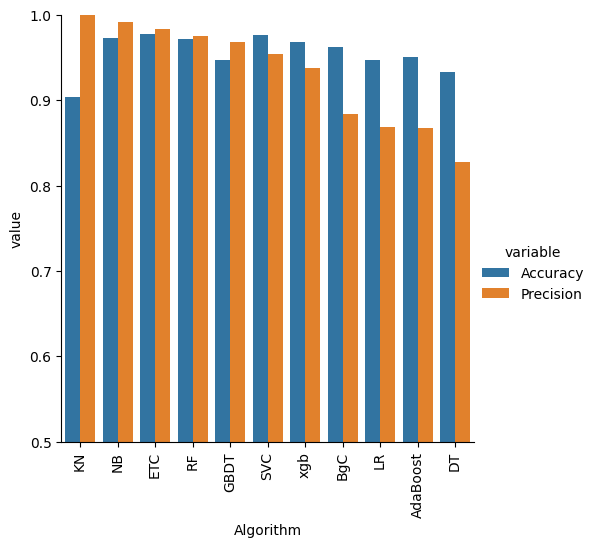

In [50]:
# Plotting the accuracy & precision for every algorithm
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

- From the above visualization we can clearly see that Multinomial naive bayes is performing very well in terms of accuracy & precision.
    1. Accuracy --> 0.972921
    2. Precision --> 0.991597

In [51]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))